# Charge Conjugation Exploration
#### The next 3 cells are imports and functions the code will need. Skip this.

In [1]:
import my_library.common_analysis_tools as ct
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts
import ROOT


Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
ROOT.gStyle.SetOptStat(0)

In [3]:
def make_kkpi_histos(df_pipkmks, df_pimkpks, filter, nbins_kkpi=40, xmin_kkpi=1.1, xmax_kkpi=1.5):
    hist_pipkmks = df_pipkmks.Histo1D((f'pipkmks_{filter}', f'pipkmks_{filter}', nbins_kkpi, xmin_kkpi, xmax_kkpi), 'pipkmks_m')
    hist_pimkpks = df_pimkpks.Histo1D((f'pimkpks_{filter}', f'pimkpks_{filter}', nbins_kkpi, xmin_kkpi, xmax_kkpi), 'pimkpks_m')
    hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
    hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
    hist_pipkmks.SetTitle(f'M(KK#pi) for {filter}')
    hist_pipkmks.GetXaxis().SetTitle('M(KK#pi) [GeV]')
    hist_pipkmks.GetYaxis().SetTitle('Counts/10MeV')
    hist_pimkpks.SetTitle(f'M(KK#pi) for {filter} ')
    hist_pimkpks.GetXaxis().SetTitle('M(KK#pi) [GeV]')
    return hist_pipkmks.GetValue(), hist_pimkpks.GetValue()


def make_2d_kkpi_histos(df_pipkmks, df_pimkpks, quantity, nbins_quantity, xmin_quantity, xmax_quantity, nbins_kkpi=40, xmin_kkpi=1.1, xmax_kkpi=1.5):
    quantity_dict = {
        'mx2_all': ('mx2_ppipkmks', 'mx2_ppimkpks', 'MX^{2}(pKK#pi) [GeV^{2}]'),
        'ks_pl': ('pathlength_sig', 'pathlength_sig', 'K_{s} pathlength [cm]'),
        'ks_m_cut': ('ks_m', 'ks_m', 'K_{s} mass [GeV]'),
        'pp': ('p_p', 'p_p', 'P(p) [GeV]'),
        'ppi': ('ppip_m', 'ppim_m', 'M(p#pi) [GeV]'),
        'kp': ('kmp_m', 'ksp_m', 'M(pK) [GeV]'),
        'kp_mirror': ('ksp_m', 'kpp_m', 'M(pK) [GeV]'),
        'kstar_charged': ('kspip_m', 'kspim_m', 'M(K^{* #pm}) [GeV]'),
        'kstar_neutral': ('kmpip_m', 'kppim_m', 'M(K^{* 0}) [GeV]')
    }
    hist_pipkmks_2d = df_pipkmks.Histo2D((f'pipkmks_{quantity}', f'pipkmks_{quantity}', nbins_kkpi, xmin_kkpi, xmax_kkpi, nbins_quantity, xmin_quantity, xmax_quantity), 'pipkmks_m', quantity_dict[quantity][0])
    hist_pimkpks_2d = df_pimkpks.Histo2D((f'pimkpks_{quantity}', f'pimkpks_{quantity}', nbins_kkpi, xmin_kkpi, xmax_kkpi, nbins_quantity, xmin_quantity, xmax_quantity), 'pimkpks_m', quantity_dict[quantity][1])
    hist_pipkmks_2d.SetTitle(f'{quantity_dict[quantity][2]}' + ' vs M(#pi^{+}K^{-}K_{s})')
    hist_pipkmks_2d.GetXaxis().SetTitle('M(#pi^{+}K^{-}K_{s}) [GeV]')
    hist_pipkmks_2d.GetYaxis().SetTitle(quantity_dict[quantity][2])
    hist_pimkpks_2d.SetTitle(f'{quantity_dict[quantity][2]}' + ' vs M(#pi^{-}K^{+}K_{s})')
    hist_pimkpks_2d.GetXaxis().SetTitle('M(#pi^{-}K^{+}K_{s}) [GeV]')
    hist_pimkpks_2d.GetYaxis().SetTitle(quantity_dict[quantity][2])
    return hist_pipkmks_2d.GetValue(), hist_pimkpks_2d.GetValue()



def build_legend(hist_pipkmks, hist_pimkpks):
    leg = ROOT.TLegend(0.8, 0.8, 0.9, 0.9)
    leg.AddEntry(hist_pipkmks, 'K^{-}K_{s}#pi^{+}', 'l')
    leg.AddEntry(hist_pimkpks, 'K^{+}K_{s}#pi^{-}', 'l')
    return leg

## The Cell below sets up the directory the files will be saved in, what type of data will be plotted, and which run period it will run over

#### Data types are "signal" and "data" for signal MC and real data
#### run periods are "spring", "fall", and "2017"


In [4]:
plot_path = '/work/halld/home/viducic/plots/acceptance_study'
data_type = 'data'
run_period = 'fall'

In [5]:
df_pipkmks = ct.get_dataframe('pipkmks', run_period, data_type, filtered=False)
df_pimkpks = ct.get_dataframe('pimkpks', run_period, data_type, filtered=False)

df_pipkmks = df_pipkmks.Define('km_p', 'sqrt(km_px*km_px + km_py*km_py + km_pz*km_pz)')
df_pimkpks = df_pimkpks.Define('kp_p', 'sqrt(kp_px*kp_px + kp_py*kp_py + kp_pz*kp_pz)')

# df_pipkmks = df_pipkmks.Filter('km_p > 1.0')
# df_pimkpks = df_pimkpks.Filter('kp_p > 1.0')


In [6]:
df_pipkmks = df_pipkmks.Filter('pipkmks_m >= 1.1 && pipkmks_m <= 1.5').Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT)
df_pimkpks = df_pimkpks.Filter('pimkpks_m >= 1.1 && pimkpks_m <= 1.5').Filter(kcuts.MX2_PPIMKPKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT)

## $M(K_s)$ Selection
### Cut $|M(\pi^+\pi^-) - 0.4971| < 0.0207$ 
2 sigma around the mean of the fit ks distribution

In [8]:
hist_ks_1_sigma_pipkmks = df_pipkmks.Filter('abs(ks_m - 0.4971) < 0.01035').Histo1D(('ks_m', 'M(#pi#pi) [GeV]', 100, 0.3, 0.7), 'ks_m').GetValue()
hist_ks_1_sigma_pimkpks = df_pimkpks.Filter('abs(ks_m - 0.4971) < 0.01035').Histo1D(('ks_m', 'M(#pi#pi) [GeV]', 100, 0.3, 0.7), 'ks_m').GetValue()
hist_ks_2_sigma_pipkmks = df_pipkmks.Filter('abs(ks_m - 0.4971) < 0.0207').Histo1D(('ks_m', 'M(#pi#pi) [GeV]', 100, 0.3, 0.7), 'ks_m').GetValue()
hist_ks_2_sigma_pimkpks = df_pimkpks.Filter('abs(ks_m - 0.4971) < 0.0207').Histo1D(('ks_m', 'M(#pi#pi) [GeV]', 100, 0.3, 0.7), 'ks_m').GetValue()



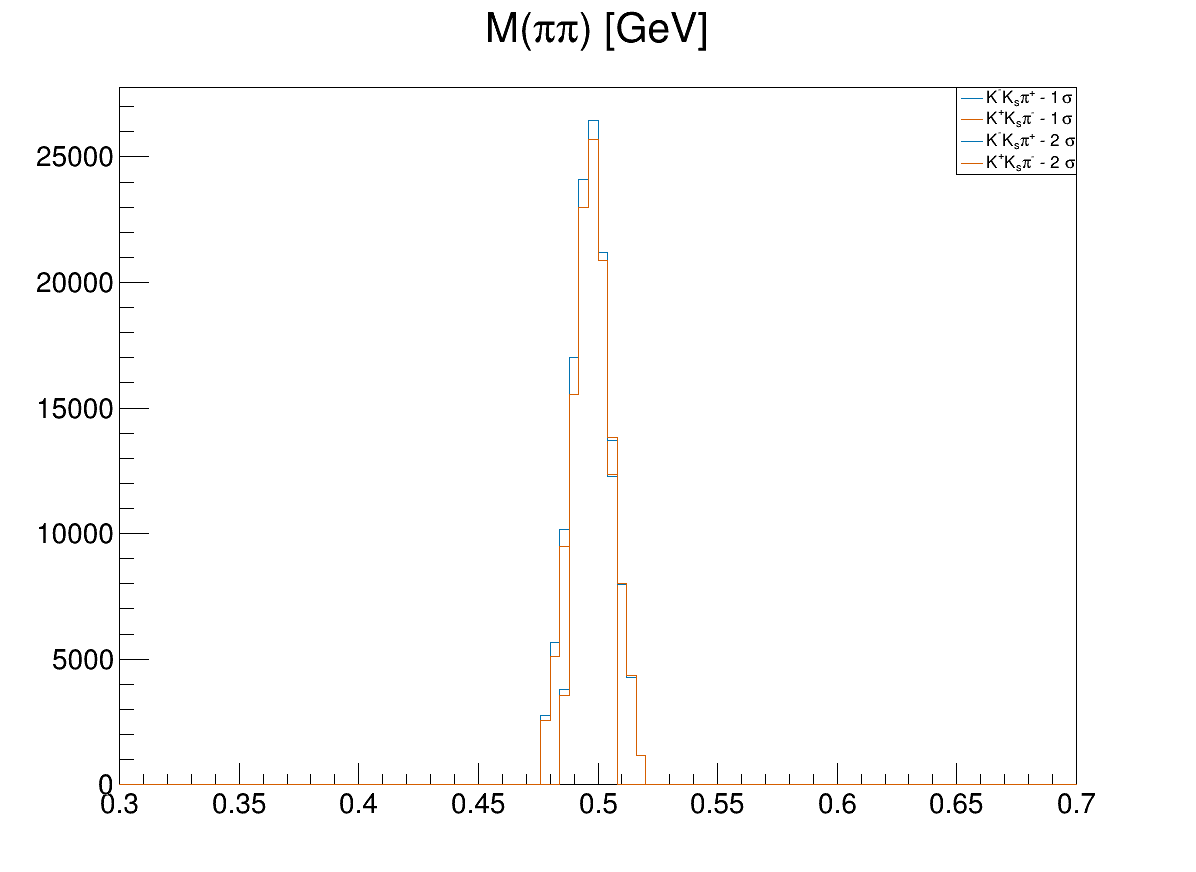

In [9]:
c1 = ROOT.TCanvas('c1', 'c1', 1200, 900)
hist_ks_1_sigma_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_ks_2_sigma_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_ks_1_sigma_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
hist_ks_2_sigma_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))

legend = ROOT.TLegend(0.8, 0.8, 0.9, 0.9)
legend.AddEntry(hist_ks_1_sigma_pipkmks, 'K^{-}K_{s}#pi^{+} - 1 #sigma', 'l')
legend.AddEntry(hist_ks_1_sigma_pimkpks, 'K^{+}K_{s}#pi^{-} - 1 #sigma', 'l')
legend.AddEntry(hist_ks_2_sigma_pipkmks, 'K^{-}K_{s}#pi^{+} - 2 #sigma', 'l')
legend.AddEntry(hist_ks_2_sigma_pimkpks, 'K^{+}K_{s}#pi^{-} - 2 #sigma', 'l')

hist_ks_1_sigma_pipkmks.Draw()
hist_ks_1_sigma_pimkpks.Draw('same')
hist_ks_2_sigma_pipkmks.Draw('same')
hist_ks_2_sigma_pimkpks.Draw('same')
legend.Draw()
c1.Draw()


In [12]:
hist_kkpi_1_sigma_pipkmks = df_pipkmks.Filter('abs(ks_m - 0.4971) < 0.01035').Histo1D(('ks_m', 'M(#pi#pi) [GeV]', 30, 1.2, 1.5), 'pipkmks_m').GetValue()
hist_kkpi_1_sigma_pimkpks = df_pimkpks.Filter('abs(ks_m - 0.4971) < 0.01035').Histo1D(('ks_m', 'M(#pi#pi) [GeV]', 30, 1.2, 1.5), 'pimkpks_m').GetValue()
hist_kkpi_2_sigma_pipkmks = df_pipkmks.Filter('abs(ks_m - 0.4971) < 0.0207').Histo1D(('ks_m', 'M(#pi#pi) [GeV]', 30, 1.2, 1.5), 'pipkmks_m').GetValue()
hist_kkpi_2_sigma_pimkpks = df_pimkpks.Filter('abs(ks_m - 0.4971) < 0.0207').Histo1D(('ks_m', 'M(#pi#pi) [GeV]', 30, 1.2, 1.5), 'pimkpks_m').GetValue()

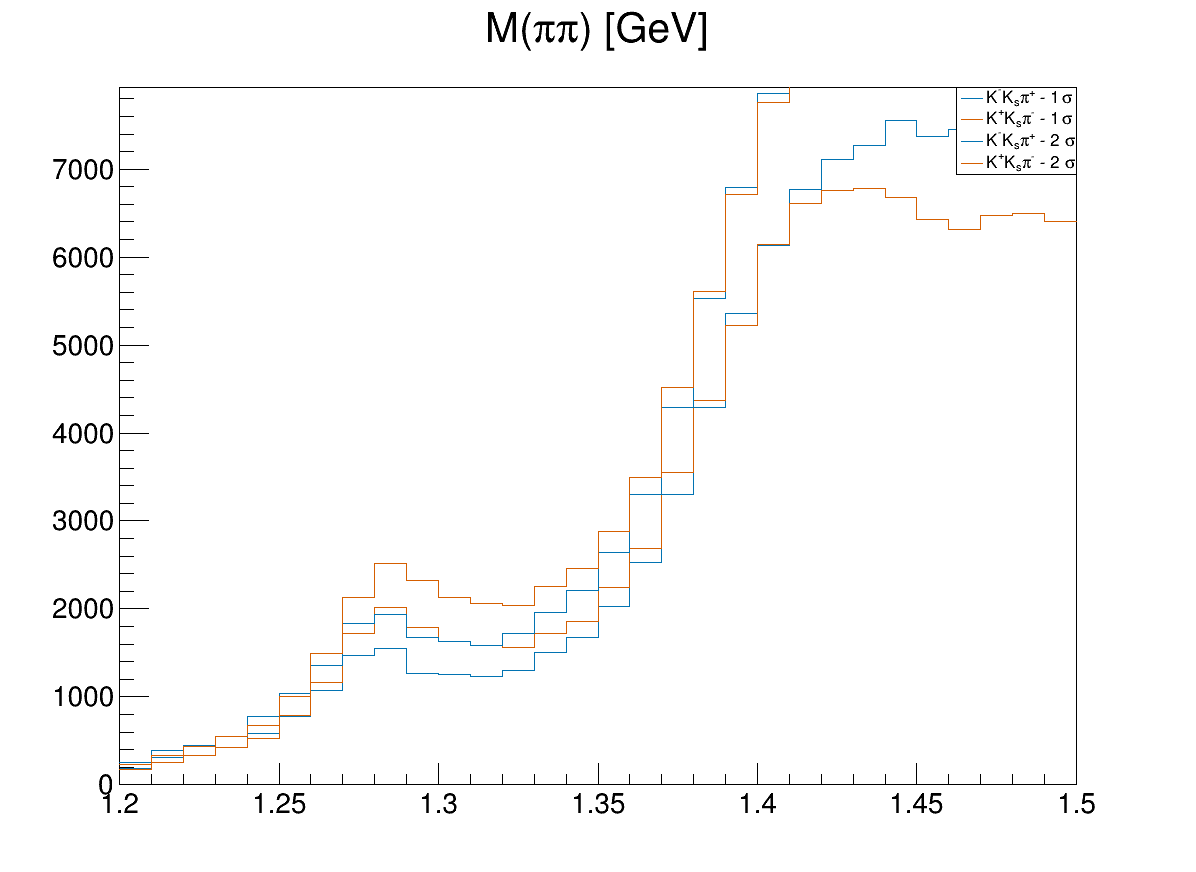

In [13]:
hist_kkpi_1_sigma_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_kkpi_2_sigma_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_kkpi_1_sigma_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
hist_kkpi_2_sigma_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))

legend = ROOT.TLegend(0.8, 0.8, 0.9, 0.9)
legend.AddEntry(hist_kkpi_1_sigma_pipkmks, 'K^{-}K_{s}#pi^{+} - 1 #sigma', 'l')
legend.AddEntry(hist_kkpi_1_sigma_pimkpks, 'K^{+}K_{s}#pi^{-} - 1 #sigma', 'l')
legend.AddEntry(hist_kkpi_2_sigma_pipkmks, 'K^{-}K_{s}#pi^{+} - 2 #sigma', 'l')
legend.AddEntry(hist_kkpi_2_sigma_pimkpks, 'K^{+}K_{s}#pi^{-} - 2 #sigma', 'l')

hist_kkpi_1_sigma_pipkmks.Draw()
hist_kkpi_1_sigma_pimkpks.Draw('same')
hist_kkpi_2_sigma_pipkmks.Draw('same')
hist_kkpi_2_sigma_pimkpks.Draw('same')
legend.Draw()
c1.Draw()